```
     _                                     ____             _       _   ____                                    
    / \   _ __ ___   __ _ _______  _ __   / ___|  ___   ___(_) __ _| | |  _ \ _ __ ___   __ _ _ __ ___  ___ ___ 
   / _ \ | '_ ` _ \ / _` |_  / _ \| '_ \  \___ \ / _ \ / __| |/ _` | | | |_) | '__/ _ \ / _` | '__/ _ \/ __/ __|
  / ___ \| | | | | | (_| |/ / (_) | | | |  ___) | (_) | (__| | (_| | | |  __/| | | (_) | (_| | | |  __/\__ \__ \
 /_/   \_\_| |_| |_|\__,_/___\___/|_| |_| |____/ \___/ \___|_|\__,_|_| |_|   |_|  \___/ \__, |_|  \___||___/___/
                                                                                        |___/                   
```

### Module
__GradientBoostingClassifier__ Gradient Boosting for classification.

### Goal
Investigating the relationship between independent variables or features and a dependent variable or outcome.

### Tools
1. Pandas
2. scikit-learn
3. GradientBoostingClassifier

### Requirement
1. File Definition
2. Data Preparation
3. hotspot_spi.csv generated
 
### Data Source
__${WORKDIR}__/data/ouptut/hotspot_spi.csv

In [1]:
import os
import sys

supervised_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
sys.path.append(supervised_dir)
sys.path

['/home/fausto/Development/workspace/amazon-social-progress/ml_models/supervised/classifier',
 '/opt/anaconda3/lib/python39.zip',
 '/opt/anaconda3/lib/python3.9',
 '/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.9/site-packages',
 '/home/fausto/Development/workspace/amazon-social-progress/ml_models/supervised']

In [2]:
import pandas as pd
import numpy as np

import functions_classifier as func
from  load_dataset import LoadDataset, SpiType

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

## Get the data

In [3]:
load_dataset = LoadDataset()
X, y = load_dataset.return_X_y_clf(spi_type = SpiType.INDICATORS)

columns_names = X.columns

X = scale(X)

In [4]:
print("X.shape:", X.shape, "y.shape:", y.shape)

X.shape: (2313, 49) y.shape: (2313,)


### Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

print("X_train.shape:", X_train.shape, "y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape, "y_test.shape:", y_test.shape)

X_train.shape: (1619, 49) y_train.shape: (1619,)
X_test.shape: (694, 49) y_test.shape: (694,)


## Modeling

### Building, train and predict model

In [6]:
params =  {
    "learning_rate": 0.1, 
    "max_depth": 4, 
    "min_samples_split": 3, 
    "n_estimators": 360
}

classifier = GradientBoostingClassifier(**params)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

### Getting Best Hyperparameter Optimization

*Note: The execution of the code below may take a few minutes or hours.*

*Uncomment and run it when you need to optimize hyperparameters.*

In [7]:
# from sklearn.model_selection import (GridSearchCV)
# import warnings

# warnings.filterwarnings("ignore")

# parameters = {   
#     "n_estimators":[50, 100, 200., 300, 400, 500, 600],
#     "learning_rate": [.1, .5, 1., 1.5, 2., 3.],
#     "algorithm": ("SAMME", "SAMME.R")
# }

# gridsearch = GridSearchCV(AdaBoostClassifier(), parameters)
# gridsearch.fit(X_train, y_train)

# print("Tuned Hyperparameters :", gridsearch.best_params_)
# print("Best Score:",gridsearch.best_score_)

### Predict and show model result

In [8]:
func.show_model_result(classifier, X, y, y_test, y_predict)


Computing cross-validated metrics
----------------------------------------------------------------------
Scores: [0.61771058 0.587473   0.61555076 0.6038961  0.58658009]
Mean = 0.60 / Standard Deviation = 0.01

Confunsion Matrix
----------------------------------------------------------------------
[[114  45   7   2]
 [ 30  88  36   6]
 [  7  55  76  40]
 [  1   9  35 143]]

Classification Report
----------------------------------------------------------------------
              precision    recall  f1-score   support

          Q1       0.75      0.68      0.71       168
          Q2       0.45      0.55      0.49       160
          Q3       0.49      0.43      0.46       178
          Q4       0.75      0.76      0.75       188

    accuracy                           0.61       694
   macro avg       0.61      0.60      0.60       694
weighted avg       0.61      0.61      0.61       694

----------------------------------------------------------------------
Accuracy: 0.61
Precici

NameError: name 'permutation_importance' is not defined

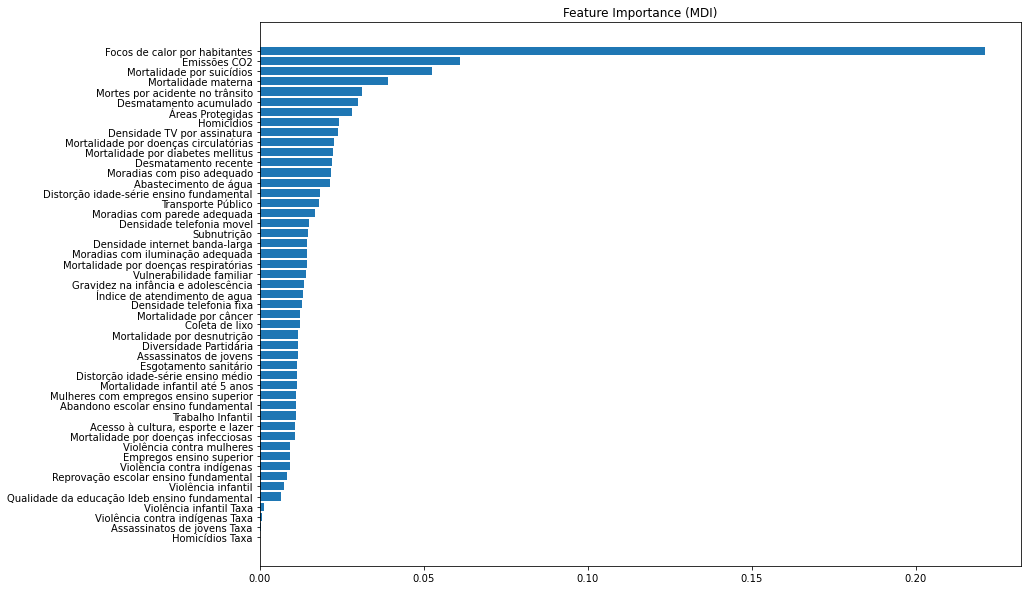

In [13]:
import matplotlib.pyplot as plt
def plot_feature_importance(model, dataset, X_test, y_test):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)    
    pos = np.arange(sorted_idx.shape[0]) + 0.5
    
    fig = plt.figure(figsize=(30, 10))
    
    plt.subplot(1, 2, 1)
    plt.barh(pos, feature_importance[sorted_idx], align="center")
    plt.yticks(pos, np.array(dataset.columns)[sorted_idx])
    plt.title("Feature Importance (MDI)")

    result = permutation_importance(
        model, 
        X_test, 
        y_test, 
        n_repeats=10, 
        n_jobs=2
    )
    
    sorted_idx = result.importances_mean.argsort()
    
    plt.subplot(1, 2, 2)
    plt.boxplot(
        result.importances[sorted_idx].T,
        vert=False,
        labels=np.array(dataset.columns)[sorted_idx],
    )

    plt.title("Permutation Importance (Test set)")
    fig.tight_layout()
    plt.show()

params = {
    "model": classifier,
    "dataset": pd.DataFrame(X, columns=columns_names),
    "X_test": X_test,
    "y_test": y_test, 
}

plot_feature_importance(**params)